In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import time
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
data_dir = "./ncmf_sim_data"

In [3]:
run_no = 1
out_dir = data_dir + "/run_" + str(run_no) + "/"
out_dir

'./ncmf_sim_data/run_1/'

In [4]:
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [5]:
#NCMF
out_dir_base_ncmf = data_dir + "/"
fname_ncmf = out_dir_base_ncmf+"dict_perf_ncmf.pkl"
#DFMF
out_dir_base_dfmf = data_dir + "/dfmf/out/"
fname_dfmf = out_dir_base_dfmf+"dict_perf_dfmf.pkl"
#DCMF
out_dir_base_dcmf = data_dir + "/dcmf/out/"
fname_dcmf = out_dir_base_dcmf+"dict_perf_dcmf.pkl"
#CMF
out_dir_base_cmf = data_dir + "/cmf/out/"
fname_cmf = out_dir_base_cmf+"dict_perf_cmf.pkl"
#gCMF
out_dir_base_gcmf = data_dir + "/gcmf/out/"
fname_gcmf = out_dir_base_gcmf+"dict_perf_gcmf.pkl"

In [6]:
dict_perf_ncmf = pkl.load(open(fname_ncmf,"rb"))
dict_perf_dfmf = pkl.load(open(fname_dfmf,"rb"))
dict_perf_dcmf = pkl.load(open(fname_dcmf,"rb"))
dict_perf_cmf = pkl.load(open(fname_cmf,"rb"))
dict_perf_gcmf = pkl.load(open(fname_gcmf,"rb"))

In [7]:
df_perf_ncmf = pd.DataFrame(dict_perf_ncmf)
df_perf_dfmf = pd.DataFrame(dict_perf_dfmf)
df_perf_dcmf = pd.DataFrame(dict_perf_dcmf)
df_perf_cmf = pd.DataFrame(dict_perf_cmf)
df_perf_gcmf = pd.DataFrame(dict_perf_gcmf)

In [8]:
dict_result = {}
mat_id_mse = 0
mat_id_auc = 2
#
dict_mse = {}
dict_auc = {}
for idx,row in df_perf_ncmf.T.iterrows():
    dict_mse[idx] = row[mat_id_mse]["perf"]
    dict_auc[idx] = row[mat_id_auc]["perf"]
dict_result["ncmf"] = {"mse":dict_mse, "auc":dict_auc}
#
dict_mse = {}
dict_auc = {}
for idx,row in df_perf_dfmf.T.iterrows():
    dict_mse[idx] = row[mat_id_mse]["perf"]
    dict_auc[idx] = row[mat_id_auc]["perf"]
dict_result["dfmf"] = {"mse":dict_mse, "auc":dict_auc}
#
dict_mse = {}
dict_auc = {}
for idx,row in df_perf_dcmf.T.iterrows():
    dict_mse[idx] = row[mat_id_mse]["perf"]
    dict_auc[idx] = row[mat_id_auc]["perf"]
dict_result["dcmf"] = {"mse":dict_mse, "auc":dict_auc}
#
dict_mse = {}
dict_auc = {}
for idx,row in df_perf_cmf.T.iterrows():
    dict_mse[idx] = row[mat_id_mse]["perf"]
    dict_auc[idx] = row[mat_id_auc]["perf"]
dict_result["cmf"] = {"mse":dict_mse, "auc":dict_auc}
#
dict_mse = {}
dict_auc = {}
for idx,row in df_perf_gcmf.T.iterrows():
    dict_mse[idx] = row[mat_id_mse]["perf"]
    dict_auc[idx] = row[mat_id_auc]["perf"]
dict_result["gcmf"] = {"mse":dict_mse, "auc":dict_auc}

In [9]:
dict_result

{'ncmf': {'mse': {'dt1': 0.2437336092057358,
   'ds1': 0.16327807120662605,
   'ds2': 0.15150898545347208,
   'ds3': 0.14632606866545064,
   'dn1': 0.25184917837912874,
   'dn2': 0.27570727815745977,
   'dn3': 0.2799367828724003},
  'auc': {'dt1': 0.6941689319032915,
   'ds1': 0.8437133864142643,
   'ds2': 0.6029452679218253,
   'ds3': 0.6853294610153968,
   'dn1': 0.7042475002178168,
   'dn2': 0.5744473489849204,
   'dn3': 0.6237791792931684}},
 'dfmf': {'mse': {'dt1': 0.22579307183680208,
   'ds1': 0.19835903393328985,
   'ds2': 0.18251994861426785,
   'ds3': 0.14150661341255336,
   'dn1': 0.24620174601986022,
   'dn2': 0.26659971424981993,
   'dn3': 0.3044976202951203},
  'auc': {'dt1': 0.5049511039797957,
   'ds1': 0.4968763066347319,
   'ds2': 0.4966578349735049,
   'ds3': 0.4972605326271715,
   'dn1': 0.5024839387504082,
   'dn2': 0.4969702532866834,
   'dn3': 0.4985082355613739}},
 'dcmf': {'mse': {'dt1': 0.23221225798884726,
   'ds1': 0.15927807964733873,
   'ds2': 0.2181219686

In [10]:
pd.json_normalize(dict_result)

ncmf.mse.dt1  ncmf.mse.ds1  ncmf.mse.ds2  ncmf.mse.ds3  ncmf.mse.dn1  \
0      0.243734      0.163278      0.151509      0.146326      0.251849   

   ncmf.mse.dn2  ncmf.mse.dn3  ncmf.auc.dt1  ncmf.auc.ds1  ncmf.auc.ds2  ...  \
0      0.275707      0.279937      0.694169      0.843713      0.602945  ...   

   gcmf.mse.dn1  gcmf.mse.dn2  gcmf.mse.dn3  gcmf.auc.dt1  gcmf.auc.ds1  \
0       0.36879      0.356071       0.40474      0.492926      0.503642   

   gcmf.auc.ds2  gcmf.auc.ds3  gcmf.auc.dn1  gcmf.auc.dn2  gcmf.auc.dn3  
0      0.499142      0.500045      0.496617       0.50337      0.498468  

[1 rows x 70 columns]

In [11]:
df = pd.DataFrame.from_dict(dict_result,orient="index").stack().to_frame()
df_result = pd.DataFrame(df[0].values.tolist(), index=df.index).T
df_result.to_csv(out_dir + "all_results.csv")
df_result

ncmf                dfmf                dcmf                 cmf  \
          mse       auc       mse       auc       mse       auc       mse   
dt1  0.243734  0.694169  0.225793  0.504951  0.232212  0.593978  0.259691   
ds1  0.163278  0.843713  0.198359  0.496876  0.159278  0.645934  0.180350   
ds2  0.151509  0.602945  0.182520  0.496658  0.218122  0.496348  0.193482   
ds3  0.146326  0.685329  0.141507  0.497261  0.192163  0.488925  0.199317   
dn1  0.251849  0.704248  0.246202  0.502484  0.318778  0.496590  0.326729   
dn2  0.275707  0.574447  0.266600  0.496970  0.344924  0.507489  0.295878   
dn3  0.279937  0.623779  0.304498  0.498508  0.387488  0.489534  0.334323   

                   gcmf            
          auc       mse       auc  
dt1  0.505565  0.321207  0.492926  
ds1  0.501905  0.216565  0.503642  
ds2  0.497094  0.241195  0.499142  
ds3  0.484979  0.207684  0.500045  
dn1  0.498392  0.368790  0.496617  
dn2  0.494531  0.356071  0.503370  
dn3  0.503001  0.404740  0.498468

In [12]:
list_datasets_all = ["ncmf","dfmf","dcmf","cmf","gcmf"]
#
list_mse = []
for cur_dataset in list_datasets_all:
    list_mse.append(df_result[cur_dataset]["mse"])
df_mse = pd.concat(list_mse,axis=1)
df_mse.columns = list_datasets_all
#
#
list_auc = []
for cur_dataset in list_datasets_all:
    list_auc.append(df_result[cur_dataset]["auc"])
df_auc = pd.concat(list_auc,axis=1)
df_auc.columns = list_datasets_all
#

In [13]:
df_auc.to_csv(out_dir + "auc.csv")
df_mse.to_csv(out_dir + "mse.csv")

In [14]:
list_datasets = ["dfmf","dcmf","cmf","gcmf"]
#
list_diff_mse = []
for cur_dataset in list_datasets:
    list_diff_mse.append(df_result["ncmf"]["mse"] - df_result[cur_dataset]["mse"])
df_diff_mse = pd.concat(list_diff_mse,axis=1)
df_diff_mse.columns = list_datasets
#
list_diff_auc = []
for cur_dataset in list_datasets:
    list_diff_auc.append(df_result["ncmf"]["auc"] - df_result[cur_dataset]["auc"])
df_diff_auc = pd.concat(list_diff_auc,axis=1)
df_diff_auc.columns = list_datasets
#

In [15]:
df_diff_auc

dfmf      dcmf       cmf      gcmf
dt1  0.189218  0.100191  0.188604  0.201243
ds1  0.346837  0.197779  0.341809  0.340072
ds2  0.106287  0.106597  0.105852  0.103803
ds3  0.188069  0.196405  0.200350  0.185285
dn1  0.201764  0.207658  0.205855  0.207630
dn2  0.077477  0.066959  0.079916  0.071077
dn3  0.125271  0.134245  0.120778  0.125312

In [16]:
df_diff_mse

dfmf      dcmf       cmf      gcmf
dt1  0.017941  0.011521 -0.015957 -0.077473
ds1 -0.035081  0.004000 -0.017072 -0.053287
ds2 -0.031011 -0.066613 -0.041973 -0.089686
ds3  0.004819 -0.045837 -0.052991 -0.061358
dn1  0.005647 -0.066929 -0.074880 -0.116941
dn2  0.009108 -0.069217 -0.020171 -0.080364
dn3 -0.024561 -0.107551 -0.054386 -0.124803

In [17]:
df_diff_auc.to_csv(out_dir + "diff_auc.csv")
df_diff_mse.to_csv(out_dir + "diff_mse.csv")

In [18]:
#

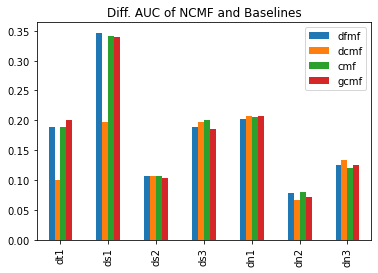

In [19]:
fig = df_diff_auc.plot.bar(title="Diff. AUC of NCMF and Baselines").get_figure()
fig.savefig(out_dir+'auc.pdf', bbox_inches='tight')
fig.savefig(out_dir+'auc.png', bbox_inches='tight')

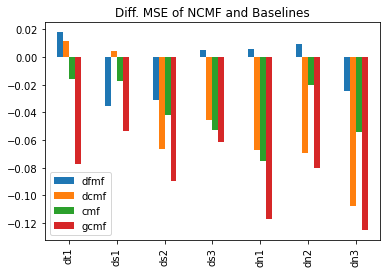

In [20]:
fig2 = df_diff_mse.plot.bar(title="Diff. MSE of NCMF and Baselines").get_figure()
fig2.savefig(out_dir+'mse.pdf', bbox_inches='tight')
fig.savefig(out_dir+'mse.png', bbox_inches='tight')